In [1]:
from sklearn.datasets import load_iris
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df = pd.read_pickle("df_cl_dummies.pkl")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32545 entries, 0 to 32560
Data columns (total 86 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32545 non-null  int64
 1   fnlwgt                                      32545 non-null  int64
 2   education-num                               32545 non-null  int64
 3   capital-gain                                32545 non-null  int64
 4   capital-loss                                32545 non-null  int64
 5   hours-per-week                              32545 non-null  int64
 6   salary                                      32545 non-null  int64
 7   workclass_ Local-gov                        32545 non-null  uint8
 8   workclass_ Never-worked                     32545 non-null  uint8
 9   workclass_ Private                          32545 non-null  uint8
 10  workclass_ Self-emp-inc           

# 2.1 Split Training and Test Datasets

Going to split the data into 60% train, 20% validation, 20% test.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('salary',axis=1), df['salary'], test_size=0.2, random_state=41)

#.8*.25
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=41) 


In [5]:
print('Shape of training feature:', X_train.shape)
print('Shape of validation feature:', X_val.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of validation label:', y_val.shape)
print('Shape of test label:', y_test.shape)

Shape of training feature: (19527, 85)
Shape of validation feature: (6509, 85)
Shape of testing feature: (6509, 85)
Shape of training label: (19527,)
Shape of validation label: (6509,)
Shape of test label: (6509,)


# 2.2 Fitting BL Models

In [6]:
#fitting standard scaler to numeric features
num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
std_scale = StandardScaler() #transforming 
X_train[num_cols] = std_scale.fit_transform(X_train[num_cols])
X_val[num_cols] = std_scale.transform(X_val[num_cols])
X_test[num_cols] = std_scale.transform(X_test[num_cols])

In [7]:
#fitting LR
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_predict_tr = logit.predict(X_train) 
y_predict_val = logit.predict(X_val)
# using the default threshold of 0.5, which is what vanilla predict does

/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
print("LOGISTIC REGRESSION")
print("Accuracy on tr set: {:6.2f}%".format(100*logit.score(X_train, y_train)))
print("Accuracy on val set: {:6.2f}%".format(100*logit.score(X_val, y_val)))
print("")
print("Precision on the tr set (threshold=0.5): {:6.4f}".format(precision_score(y_train, y_predict_tr))) 
print("Precision on the val set (threshold=0.5): {:6.4f}".format(precision_score(y_val, y_predict_val)))
print("")
print("Recall on tr set (threshold=0.5): {:6.4f}".format(recall_score(y_train, y_predict_tr))) 
print("Recall on val set (threshold=0.5): {:6.4f}".format(recall_score(y_val, y_predict_val)))


LOGISTIC REGRESSION
Accuracy on tr set:  85.28%
Accuracy on val set:  84.67%

Precision on the tr set (threshold=0.5): 0.7382
Precision on the val set (threshold=0.5): 0.7226

Recall on tr set (threshold=0.5): 0.6068
Recall on val set (threshold=0.5): 0.6075


In [9]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4914
           1       0.72      0.61      0.66      1595

    accuracy                           0.85      6509
   macro avg       0.80      0.77      0.78      6509
weighted avg       0.84      0.85      0.84      6509



In [10]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model on training data
# Use the forest's predict method on the test data
rf.fit(X_train, y_train)
y_predict_rf_tr = rf.predict(X_train) 
y_predict_rf_val = rf.predict(X_val)

In [11]:
print("RANDOM FOREST")
print("Accuracy on tr set: {:6.2f}%".format(100*rf.score(X_train, y_train)))
print("Accuracy on val set: {:6.2f}%".format(100*rf.score(X_val, y_val)))
print("")
print("Precision on the tr set: {:6.4f}".format(precision_score(y_train, y_predict_rf_tr))) 
print("Precision on the val set: {:6.4f}".format(precision_score(y_val, y_predict_rf_val)))
print("")
print("Recall on tr set: {:6.4f}".format(recall_score(y_train, y_predict_rf_tr))) 
print("Recall on val set: {:6.4f}".format(recall_score(y_val, y_predict_rf_val)))


RANDOM FOREST
Accuracy on tr set:  99.99%
Accuracy on val set:  85.01%

Precision on the tr set: 1.0000
Precision on the val set: 0.7339

Recall on tr set: 0.9998
Recall on val set: 0.6088


In [12]:
print(classification_report(y_val, y_predict_rf_val))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4914
           1       0.73      0.61      0.67      1595

    accuracy                           0.85      6509
   macro avg       0.81      0.77      0.78      6509
weighted avg       0.84      0.85      0.85      6509



In [13]:
#AUC-ROC curve is a performance metric for binary classification problem at different thresholds.
#ROC is a probability curve and AUC represents the degree or measure of separability.
#It tells how much model is capable of distinguishing between classes. 
#Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.


#this function below was taken from the following site:
#https://www.imranabdullah.com/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
classifiers = [LogisticRegression(random_state=41), 
               RandomForestClassifier(random_state=41)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_val)[::,1]
    
    fpr, tpr, _ = roc_curve(y_val,  yproba)
    auc = roc_auc_score(y_val, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


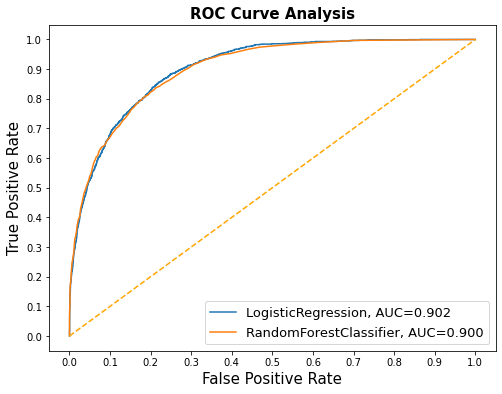

In [14]:
#this graph below was taken from the following site:
#https://www.imranabdullah.com/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()